In [ ]:
import os, warnings
import numpy as np
# 경고 메시지 무시하거나 숨길때(ignore), 다시보이게(default)
# warnings.filterwarnings(action='default')
warnings.filterwarnings(action='ignore')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
import mglearn
from sklearn.model_selection import KFold
from sklearn.svm import SVC

In [ ]:
iris = load_iris() 
logreg = LogisticRegression()   # 모델 선택


In [ ]:
# 데이터 셋 나누기
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [ ]:
best_score = 0

gamma_par = [0.001, 0.01, 0.1, 1, 10, 100]
C_par = [0.001, 0.01, 0.1, 1, 10, 100]

for par_g in gamma_par:
    for par_c in C_par:
        svm = SVC(gamma=par_g, C=par_c)
        svm.fit(X_train, y_train)

        # 테스트 세트로 SVC 평가
        score = svm.score(X_test, y_test)

        if score>best_score:
            best_score=score
            best_parameters={'C':par_c,'gamma':par_g}
            print("gamma : {}, C :{}  score : {}".format(par_g, par_c, score))

In [ ]:
from sklearn.svm import SVC

# 학습(훈련 + 검증), 테스트로 분할
X_trainval,X_test,y_trainval,y_test=train_test_split(X,y,random_state=0)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=0)

In [ ]:
print('훈련세트: {}, 검증세트: {}, 테스트 세트: {}'.format(X_train.shape, X_valid.shape, X_test.shape))

In [ ]:
best_score = 0

gamma_par = [0.001, 0.01, 0.1, 1, 10, 100]
C_par = [0.001, 0.01, 0.1, 1, 10, 100]

for par_g in gamma_par:
    for par_c in C_par:
        svm = SVC(gamma=par_g, C=par_c)
        svm.fit(X_train, y_train)

        # 검증 세트로 SVC 평가
        score = svm.score(X_valid, y_valid)

        if score>best_score:
            best_score=score
            best_parameters={'C':par_c,'gamma':par_g}
            print("gamma : {}, C :{}  score : {}".format(par_g, par_c, score))

In [ ]:
### 최종 평가
svm=SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score=svm.score(X_test, y_test)

print('최적의 매개변수 : {}'.format(best_parameters))
print('최적의 매개변수(테스트) 평가 점수 : {:.2f}'.format(test_score))

In [ ]:
best_score = 0

gamma_par = [0.001, 0.01, 0.1, 1, 10, 100]
C_par = [0.001, 0.01, 0.1, 1, 10, 100]

for par_g in gamma_par:
    for par_c in C_par:
        svm = SVC(gamma=par_g, C=par_c)
        svm.fit(X_train, y_train)

        # 검증 세트로 SVC 평가 *****
        scores = cross_val_score(svm,X_trainval,y_trainval,cv=5)
        score=np.mean(scores)


        if score > best_score:
            best_score = score
            best_parameters = {'C':par_c, 'gamma':par_g}
            print("gamma : {}, C :{}  score : {}".format(par_g, par_c, score)) 

In [30]:
### 최종 평가.
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("검증 세트에서 최고 점수 : {:.2f}".format(best_score))
print("최적의 매개변수 : {} ".format(best_parameters))
print("최적의 매개변수(테스트) 평가 점수 : {:.2f}".format(test_score))

검증 세트에서 최고 점수 : 0.97
최적의 매개변수 : {'C': 10, 'gamma': 0.1} 
최적의 매개변수(테스트) 평가 점수 : 0.97


In [ ]:
mglearn.plots.plot_cross_val_selection()

In [ ]:
mglearn.plots.plot_grid_search_overview()

### GridSearchCV를 사용한 최적의 매개변수 찾기

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search=GridSearchCV(SVC(), param_grid,cv=5,return_train_score=True)
print(grid_search)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)


In [35]:
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100] }

In [36]:
X_train,X_test,y_train,y_test=train_test_split(iris.data, iris.target, random_state=0)

In [37]:
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

0.9736842105263158

In [38]:
print('최적 매개 변수 : ',grid_search.best_params_)
print('최고 교차 검증 점수 : {:.2f}'.format(grid_search.best_score_))

#최고 성능 모델 확인
print('최고 성능 모델\n',grid_search.best_estimator_)

최적 매개 변수 :  {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수 : 0.97
최고 성능 모델
 SVC(C=10, gamma=0.1)


### GridSearchCV를 이용해 확인한 매개변수 결과값 전체를 확인해보자

In [ ]:
import pandas as pd 

In [39]:
pd.set_option('display.max_columns',None) #화면에 출력하는 열 수 제한 해제

results = pd.DataFrame(grid_search.cv_results_)
results.shape


(36, 22)

In [40]:
display(np.transpose(results.head() ))

,0,1,2,3,4
mean_fit_time,0.00112724,0.00100007,0.00119758,0.000997066,0.00120153
std_fit_time,0.000249689,0.000627904,0.000397206,9.88791e-07,0.000751532
mean_score_time,0.000796366,0.000394106,0.000600767,0.000599813,0.000199413
std_score_time,0.000398184,0.000482742,0.000490554,0.000800408,0.000398827
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


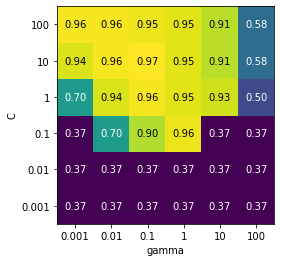

In [41]:
scores = np.array(results.mean_test_score).reshape(6,6)

# 교차 검증 평균 점수 히트맵 그래프
mglearn.tools.heatmap(scores, 
                      xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'],
                      cmap='viridis'            
                      )

### 매개변수의 검색 범위가 적절하지 않다면

In [43]:
import matplotlib.pyplot as plt

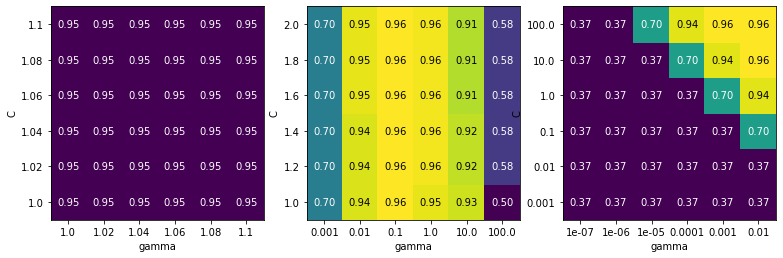

In [45]:
fig, axes = plt.subplots(1,3, figsize=(13,5))

param_grid_linear = {'C':np.linspace(1.0,1.1,6),
                     'gamma': np.linspace(1.0,1.1,6) }

# C의 값 설정이 잘못됨. --> 감마에 비해 C의 범위를 너무 작게 잡음.
param_grid_one_log = {'C':np.linspace(1,2,6), 
                     'gamma': np.logspace(-3,2,6) }

param_grid_range = {'C': np.logspace(-3,2,6),
                    'gamma': np.logspace(-7,-2,6) }

for param_grid, ax in zip([param_grid_linear,
                            param_grid_one_log,
                            param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    

    # 교차 검증 평균 점수 히트맵 그래프
    scores_image = mglearn.tools.heatmap(scores, 
                      xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'],
                      cmap='viridis', ax=ax                                       
                      )